In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('C:\\Users\\Lilacfei\\Documents\\Data Science Introduction\\Jupyter notebook\\AI Intro\\AirQualityUCI\\AirQualityUCI.xlsx')

In [7]:
re.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


{'bodies': [<matplotlib.collections.PolyCollection at 0x274b244b390>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x274b1a93da0>,
 'cmins': <matplotlib.collections.LineCollection at 0x274b244b860>,
 'cbars': <matplotlib.collections.LineCollection at 0x274b244bac8>}

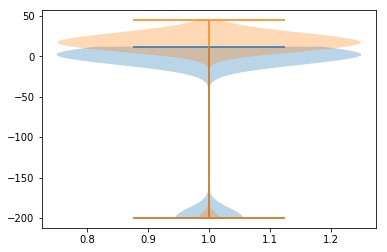

In [23]:
plt.violinplot(df['CO(GT)'])
plt.violinplot(df['T'])

In [36]:
def check_err(col1,col2):
    case = df[[col1,col2]]
    case = case[~case[col1].isin([-200])]
    case = case[~case[col2].isin([-200])]
    return case.reset_index(drop=True)

In [37]:
case1 = check_err('CO(GT)','PT08.S1(CO)')
case2 = check_err('NMHC(GT)','PT08.S2(NMHC)')
case3 = check_err('NOx(GT)','PT08.S3(NOx)')
case4 = check_err('NO2(GT)','PT08.S4(NO2)')

## 比较每对测量值去除特殊值行之后所剩余的行数

In [38]:
print(len(case1),len(case2),len(case3),len(case4))

7344 887 7396 7393


## 因为NOx的数据最齐全，所以选NOx作为研究对象：
### >>根据传感器的值结合环境其他数据估计氧化物真实值

In [39]:
re = df[['NOx(GT)','PT08.S3(NOx)','T','RH','AH']]

In [40]:
col1 = np.array(re['NOx(GT)'])
col2 = np.array(re['PT08.S3(NOx)'])

In [41]:
col1[col1 == -200] = np.mean(case3['NOx(GT)'])
col2[col2 == -200] = np.mean(case3['PT08.S3(NOx)'])

In [42]:
re['NOx(GT)'] = col1
re['PT08.S3(NOx)'] = col2

C:\Users\Lilacfei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lilacfei\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
re.describe()

,NOx(GT),PT08.S3(NOx),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,246.056777,834.942290,9.776600,39.483611,-6.837604
std,193.427692,251.750751,43.203438,51.215645,38.976670
min,2.000000,322.000000,-200.000000,-200.000000,-200.000000
25%,112.000000,665.500000,10.950000,34.050000,0.692275
50%,229.000000,817.500000,17.200000,48.550000,0.976823
75%,284.200000,960.250000,24.075000,61.875000,1.296223
max,1479.000000,2682.750000,44.600000,88.725000,2.231036


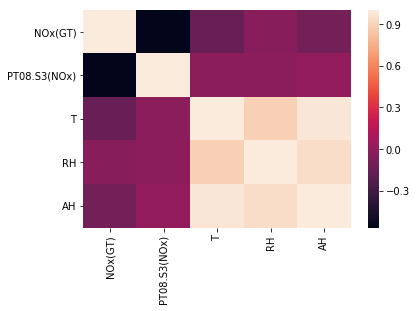

In [64]:
import seaborn as sns
pt = re.corr()
sns.heatmap(pt)

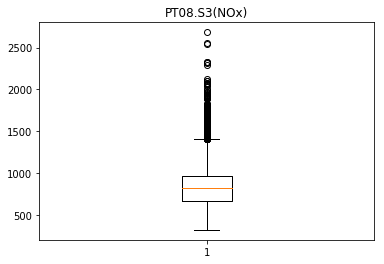

In [43]:
plt.boxplot(re['PT08.S3(NOx)'])
plt.title('PT08.S3(NOx)')
plt.savefig('C:\\Users\\Lilacfei\\Desktop')

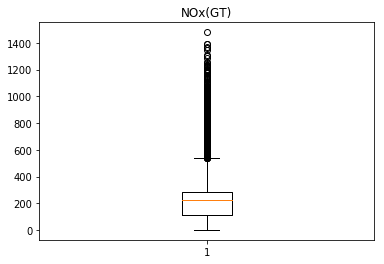

In [44]:
plt.boxplot(re['NOx(GT)'])
plt.title('NOx(GT)')
plt.savefig('C:\\Users\\Lilacfei\\Desktop')

In [45]:
X = np.array(re[['PT08.S3(NOx)','T','RH','AH']])
y = np.array(re[['NOx(GT)']])

In [52]:
from lib.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [54]:
from lib.LinearRegression import LinearRegression
reg = LinearRegression()
reg.fit_normal(X_train, y_train)

LinearRegression()

In [57]:
print(reg.score(std_test_X, y_test))

0.43722984120766495
